In [1]:
'''
1. site_id - ID code for the source hospital.
2. patient_id - ID code for the patient.
3. image_id - ID code for the image.
4. laterality - Whether the image is of the left or right breast.
5. view - The orientation of the image. The default for a screening exam is to capture two views per breast.
6. age - The patient's age in years.
7. implant - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.
8. density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.
9. machine_id - An ID code for the imaging device.
10. cancer - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.
11. biopsy - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.
12. invasive - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.
13. BIRADS - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.
14. prediction_id - The ID for the matching submission row. Multiple images will share the same prediction ID. Test only.
15. difficult_negative_case - True if the case was unusually difficult. Only provided for train.
'''

"\n1. site_id - ID code for the source hospital.\n2. patient_id - ID code for the patient.\n3. image_id - ID code for the image.\n4. laterality - Whether the image is of the left or right breast.\n5. view - The orientation of the image. The default for a screening exam is to capture two views per breast.\n6. age - The patient's age in years.\n7. implant - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.\n8. density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.\n9. machine_id - An ID code for the imaging device.\n10. cancer - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.\n11. biopsy - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.\n12. invasive - If the breas

In [ ]:
'''Importing the libraries'''

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the csv
path = 'D:/Project_data/train.csv'
df = pd.read_csv(path)

In [ ]:
'''Getting a view of the data'''

In [4]:
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [5]:
df.columns

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')

In [6]:
df.shape # There are total 54706 rows and 14 columns

(54706, 14)

In [7]:
df.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [ ]:
'''Counting the number of patients'''

In [8]:
df['patient_id'].nunique()

11913

In [9]:
df['view'].unique()

array(['CC', 'MLO', 'ML', 'LM', 'AT', 'LMO'], dtype=object)

In [10]:
df['density'].unique()

array([nan, 'C', 'D', 'B', 'A'], dtype=object)

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of views')

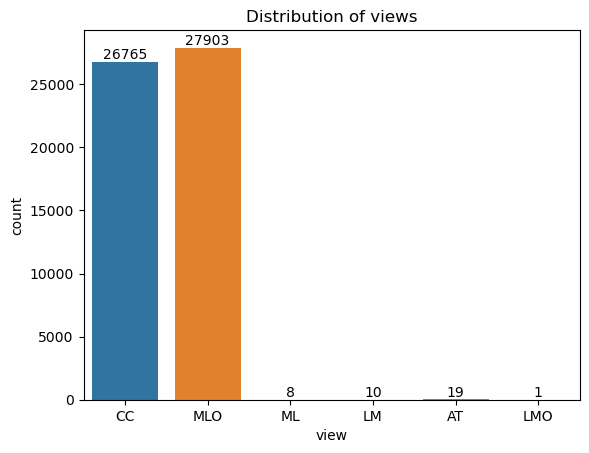

In [11]:
ax=sns.countplot(df['view'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of views')

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of targets')

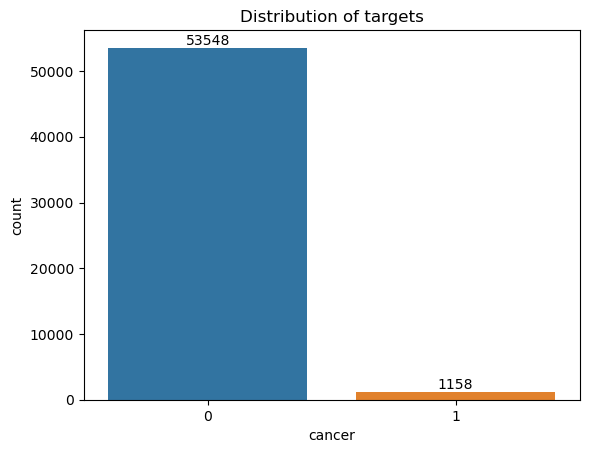

In [12]:
ax1=sns.countplot(df['cancer'])
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Distribution of targets')

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Density')

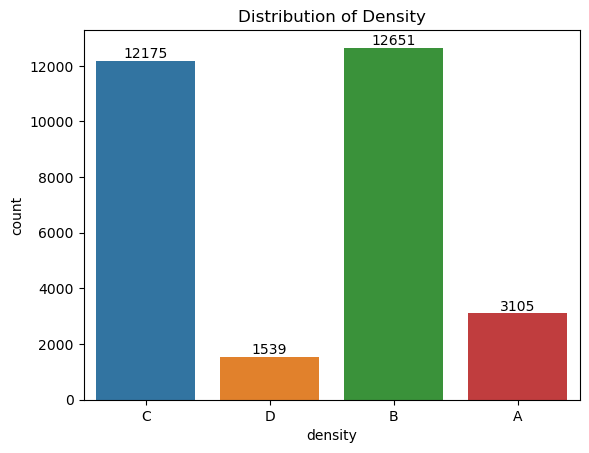

In [13]:
ax2=sns.countplot(df['density'])
for container in ax2.containers:
    ax2.bar_label(container)
plt.title('Distribution of Density')

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of BIRADS')

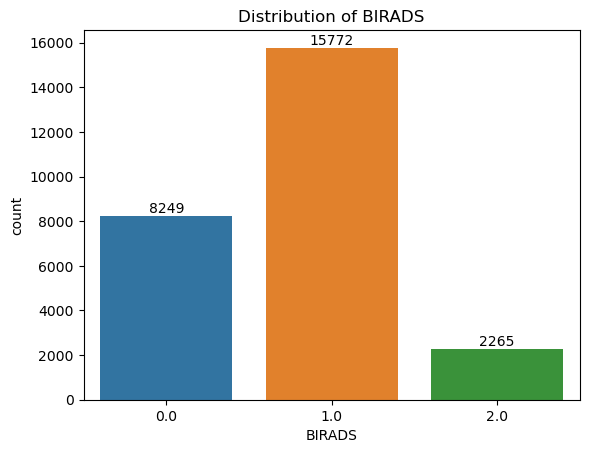

In [24]:
ax3 = sns.countplot(df['BIRADS'])
for container in ax3.containers:
    ax3.bar_label(container)
plt.title('Distribution of BIRADS')